###  <h1><center>Задача $1.1$</center></h1>
## <h1><center>Агафонов Артём</center></h1>

In [0]:
import numpy as np  
import matplotlib.pylab as plt
import scipy.stats as st

In [0]:
def rejected (test, data, alpha):
    rejected = 0
    if test == lilliefors:
      if lilliefors(data, dist='norm', pvalmethod='table')[1] <= alpha:
        rejected += 1
    else:
      if test(data, )[1] <= alpha:
        rejected += 1
    return rejected

In [0]:
sizes = [10, 50, 100, 200, 500, 900]

In [0]:
n_exps = 500
alpha = 0.05

## Критерий Лиллиефорса

In [0]:
from statsmodels.stats.diagnostic import lilliefors

### Нормальное распределение

Только для нормального распределения мы можем определить консервативность, т.к. только в этом случае верна нулевая гипотеза.

In [7]:
alphas = []
for size in sizes:
  print("Для выборок длины "+str(size)+" ошибки первого рода равны: ")   
  #for j in range(10):
  rej_exp = 0
  for i in range(n_exps):
    mean = (np.random.rand() - 0.5) * 100
    std = np.random.rand() * 100 
    data = st.norm.rvs(size=size, loc = mean, scale = std)
    rej = rejected(lilliefors, data, alpha)
    rej_exp = rej_exp + rej
  print(rej_exp / n_exps, end='\n')
  alphas.append(rej_exp / n_exps) 
print("\n")


if (np.mean(alphas) < 0.05):
  print("Критерий консервативен")
else:
  print("Критерий неконсервативен")  

Для выборок длины 10 ошибки первого рода равны: 
0.038
Для выборок длины 50 ошибки первого рода равны: 
0.05
Для выборок длины 100 ошибки первого рода равны: 
0.058
Для выборок длины 200 ошибки первого рода равны: 
0.004
Для выборок длины 500 ошибки первого рода равны: 
0.046
Для выборок длины 900 ошибки первого рода равны: 
0.07


Критерий консервативен


### Усеченное нормальное распределение

In [8]:
pows_trun = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      mean = (np.random.rand() - 0.5) * 100
      std = np.random.rand() * 100 
      a=(-1-mean)/std
      b=(1-mean)/std
      data = st.truncnorm.rvs(size=size, loc = mean, scale = std, a = a, b = b)
      rej = rejected(lilliefors, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp/ n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_trun.append(np.mean(rejs))
  print("\n")

Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.076 0.086 0.092 0.064 0.09 0.062 0.064 0.064 0.058 0.07 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.242 0.214 0.228 0.21 0.188 0.226 0.228 0.22 0.214 0.23 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.652 0.614 0.636 0.618 0.612 0.606 0.598 0.59 0.626 0.64 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
0.774 0.72 0.74 0.738 0.734 0.736 0.762 0.734 0.766 0.77 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 



###  Распределение Лапласса

In [9]:
pows_lap = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      mean = (np.random.rand() - 0.5) * 100
      std = np.random.rand() * 100 
      data = st.laplace.rvs(size=size, loc = mean)
      rej = rejected(lilliefors, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp/ n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_lap.append(np.mean(rejs))
  print("\n")

Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.16 0.156 0.142 0.134 0.148 0.138 0.148 0.134 0.156 0.162 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.348 0.342 0.338 0.326 0.372 0.346 0.332 0.344 0.364 0.346 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.694 0.722 0.69 0.708 0.714 0.694 0.7 0.684 0.708 0.726 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
0.774 0.822 0.798 0.834 0.802 0.826 0.84 0.814 0.8 0.806 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 0.996 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 



### Распределение Стьюдента

In [10]:
pows_st = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      n = np.random.randint(low = 1, high = 7) 
      data = st.t.rvs(size = size, df = n)
      rej = rejected(lilliefors, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp/ n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_st.append(np.mean(rejs))
  print("\n")

Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.196 0.23 0.2 0.222 0.2 0.228 0.224 0.268 0.246 0.24 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.462 0.46 0.452 0.482 0.482 0.446 0.424 0.416 0.464 0.468 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.594 0.594 0.612 0.644 0.604 0.584 0.612 0.628 0.64 0.63 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
0.658 0.66 0.644 0.638 0.638 0.66 0.66 0.642 0.638 0.64 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
0.924 0.916 0.938 0.94 0.94 0.914 0.942 0.924 0.928 0.92 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
0.988 0.992 0.99 0.99 0.982 0.99 0.988 0.99 0.992 0.984 



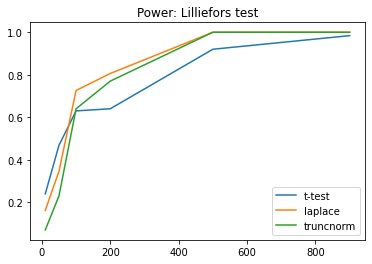

In [11]:
plt.title("Power: Lilliefors test")
plt.plot(sizes, pows_st,  label='t-test')
plt.plot(sizes, pows_lap,  label='laplace')
plt.plot(sizes, pows_trun,  label='truncnorm')
plt.legend()
plt.show()

### Выводы

*   Асимтотически мощность критерия стремится к 1
*   Критерий консервативен



## Критерий Харке-Бера

In [0]:
from statsmodels.stats.stattools import jarque_bera

### Нормальное распределение

In [15]:
alphas = []
for size in [10, 50, 100, 200, 500, 1000, 2000, 5000]:
  print("Для выборок длины "+str(size)+" ошибки первого рода равны: ")   
  #for j in range(10):
  rej_exp = 0
  for i in range(n_exps):
    mean = (np.random.rand() - 0.5) * 100
    std = np.random.rand() * 100 
    data = st.norm.rvs(size=size, loc = mean, scale = std)
    rej = rejected(jarque_bera, data, alpha)
    rej_exp = rej_exp + rej
  print(rej_exp / n_exps, end='\n')
print("\n")


if (np.mean(alphas) < 0.05):
  print("Критерий консервативен")
else:
  print("Критерий неконсервативен")  

Для выборок длины 10 ошибки первого рода равны: 
0.01
Для выборок длины 50 ошибки первого рода равны: 
0.048
Для выборок длины 100 ошибки первого рода равны: 
0.048
Для выборок длины 200 ошибки первого рода равны: 
0.034
Для выборок длины 500 ошибки первого рода равны: 
0.05
Для выборок длины 1000 ошибки первого рода равны: 
0.064
Для выборок длины 2000 ошибки первого рода равны: 
0.038
Для выборок длины 5000 ошибки первого рода равны: 
0.044


Критерий неконсервативен


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Усеченное нормальное распределение

In [16]:
pows_trun = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      mean = (np.random.rand() - 0.5) * 100
      std = np.random.rand() * 100 
      a=(-1-mean)/std
      b=(1-mean)/std
      data = st.truncnorm.rvs(size=size, loc = mean, scale = std, a = a, b = b)
      rej = rejected(jarque_bera, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp / n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_trun.append(np.mean(rejs))
  print("\n")


Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.0 0.006 0.004 0.006 0.006 0.008 0.006 0.012 0.014 0.008 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.044 0.052 0.044 0.042 0.046 0.038 0.044 0.042 0.05 0.034 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.582 0.594 0.594 0.594 0.606 0.574 0.604 0.554 0.614 0.588 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.998 1.0 



### Распределение Лапласса


In [17]:
pows_lap = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      mean = (np.random.rand() - 0.5) * 100
      std = np.random.rand() * 100 
      data = st.laplace.rvs(size=size, loc = mean)
      rej = rejected(jarque_bera, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp / n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_lap.append(np.mean(rejs))
  print("\n")

Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.066 0.066 0.064 0.076 0.06 0.07 0.056 0.062 0.062 0.058 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.536 0.526 0.51 0.514 0.514 0.51 0.528 0.514 0.512 0.482 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.77 0.746 0.766 0.736 0.768 0.776 0.792 0.788 0.776 0.806 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
0.962 0.972 0.954 0.982 0.978 0.962 0.954 0.97 0.972 0.952 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 



### Распределение Стьюдента

In [18]:
pows_st = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      n = np.random.randint(low = 1, high = 7) 
      data = st.t.rvs(size = size, df = n)
      rej = rejected(jarque_bera, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp / n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_st.append(np.mean(rejs))
  print("\n")


Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.14 0.112 0.156 0.142 0.12 0.138 0.168 0.14 0.128 0.1 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.64 0.636 0.674 0.644 0.644 0.604 0.608 0.666 0.598 0.616 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.826 0.748 0.79 0.772 0.818 0.798 0.794 0.82 0.834 0.808 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
0.934 0.928 0.934 0.942 0.906 0.914 0.932 0.898 0.906 0.928 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
0.996 0.992 0.994 0.998 0.998 0.998 0.992 0.998 0.992 0.994 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 



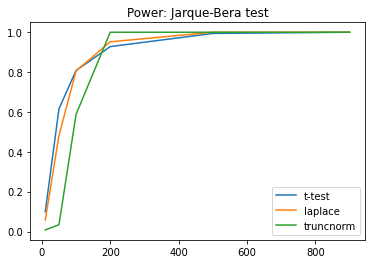

In [19]:
plt.title("Power: Jarque-Bera test")
plt.plot(sizes, pows_st,  label='t-test')
plt.plot(sizes, pows_lap,  label='laplace')
plt.plot(sizes, pows_trun,  label='truncnorm')
plt.legend()
plt.show()

## Выводы


*   Асимтотически мощность критерия стремится к 1
*   Критерий консервативен



## Критерий Шапиро-Уилика

In [0]:
from scipy.stats import shapiro

### Нормальное распределение

In [21]:
alphas = []
for size in [10, 50, 100, 200, 500, 1000, 2000, 5000]:
  print("Для выборок длины "+str(size)+" ошибки первого рода равны: ")   
  #for j in range(10):
  rej_exp = 0
  for i in range(n_exps):
    mean = (np.random.rand() - 0.5) * 100
    std = np.random.rand() * 100 
    data = st.norm.rvs(size=size, loc = mean, scale = std)
    rej = rejected(shapiro, data, alpha)
    rej_exp = rej_exp + rej
  print(rej_exp / n_exps, end='\n')
print("\n")


if (np.mean(alphas) < 0.05):
  print("Критерий консервативен")
else:
  print("Критерий неконсервативен")  

Для выборок длины 10 ошибки первого рода равны: 
0.052
Для выборок длины 50 ошибки первого рода равны: 
0.036
Для выборок длины 100 ошибки первого рода равны: 
0.072
Для выборок длины 200 ошибки первого рода равны: 
0.05
Для выборок длины 500 ошибки первого рода равны: 
0.046
Для выборок длины 1000 ошибки первого рода равны: 
0.074
Для выборок длины 2000 ошибки первого рода равны: 
0.048
Для выборок длины 5000 ошибки первого рода равны: 
0.028


Критерий неконсервативен


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Усеченное нормальное распределение

In [24]:
pows_trun = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      mean = (np.random.rand() - 0.5) * 100
      std = np.random.rand() * 100 
      a=(-1-mean)/std
      b=(1-mean)/std
      data = st.truncnorm.rvs(size=size, loc = mean, scale = std, a = a, b = b)
      rej = rejected(shapiro, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp / n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_trun.append(np.mean(rejs))
  print("\n")

Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.092 0.08 0.114 0.102 0.08 0.114 0.09 0.118 0.102 0.076 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.762 0.764 0.754 0.77 0.76 0.786 0.762 0.776 0.76 0.728 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.998 0.998 0.996 0.998 1.0 0.998 0.994 0.994 0.998 1.0 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 



### Распределение Лапласса

In [25]:
pows_lap = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      mean = (np.random.rand() - 0.5) * 100
      std = np.random.rand() * 100 
      data = st.laplace.rvs(size=size, loc = mean)
      rej = rejected(shapiro, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp / n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_lap.append(np.mean(rejs))
  print("\n")

Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.154 0.14 0.168 0.186 0.154 0.15 0.164 0.192 0.17 0.154 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.516 0.508 0.51 0.528 0.518 0.534 0.506 0.522 0.54 0.514 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.796 0.82 0.792 0.774 0.806 0.814 0.778 0.826 0.764 0.804 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
0.964 0.974 0.976 0.986 0.97 0.978 0.974 0.976 0.98 0.964 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 



### Распределение Стьюдента

In [26]:
pows_st = []
for size in sizes:
  print("Для выборок длины "+str(size)+" мощности критерия для 10 различных генераций параметров равны: ")   
  for j in range(10):
    rejs = []
    rej_exp = 0
    for i in range(n_exps):
      n = np.random.randint(low = 1, high = 7) 
      data = st.t.rvs(size = size, df = n)
      rej = rejected(shapiro, data, alpha)
      rej_exp = rej_exp + rej
    rejs.append(rej_exp / n_exps)
    print(rej_exp / n_exps, end=' ')
  pows_st.append(np.mean(rejs))
  print("\n")


Для выборок длины 10 мощности критерия для 10 различных генераций параметров равны: 
0.23 0.232 0.252 0.244 0.21 0.232 0.214 0.212 0.226 0.222 

Для выборок длины 50 мощности критерия для 10 различных генераций параметров равны: 
0.582 0.588 0.564 0.606 0.614 0.598 0.632 0.594 0.62 0.578 

Для выборок длины 100 мощности критерия для 10 различных генераций параметров равны: 
0.79 0.73 0.748 0.762 0.776 0.754 0.732 0.758 0.766 0.75 

Для выборок длины 200 мощности критерия для 10 различных генераций параметров равны: 
0.904 0.898 0.91 0.906 0.916 0.9 0.912 0.894 0.91 0.9 

Для выборок длины 500 мощности критерия для 10 различных генераций параметров равны: 
0.996 0.992 0.99 0.996 0.988 0.994 0.988 0.99 0.986 0.99 

Для выборок длины 900 мощности критерия для 10 различных генераций параметров равны: 
1.0 1.0 1.0 0.998 1.0 1.0 0.998 1.0 1.0 0.998 



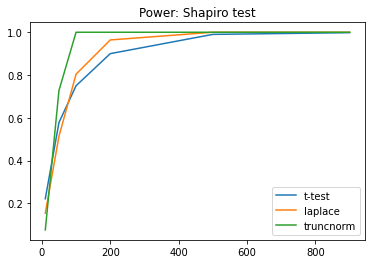

In [27]:
plt.title("Power: Shapiro test")
plt.plot(sizes, pows_st,  label='t-test')
plt.plot(sizes, pows_lap,  label='laplace')
plt.plot(sizes, pows_trun,  label='truncnorm')
plt.legend()
plt.show()

### Выводы


*   Мощность асимтотически стремится к 1
*   Неконсервативен

